In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ---------------- LOAD DATA ----------------
df = pd.read_csv("student_exam_scores_12_13.csv")
print("\n--- First 5 Rows ---")
print(df.head())

# ---------------- SELECT FEATURES & TARGET ----------------
X = df[['hours_studied', 'sleep_hours', 'attendance_percent', 'Internal_marks']].values
y = df['exam_score'].values.reshape(-1,1)

# ---------------- ADD BIAS COLUMN ----------------
X_b = np.hstack([np.ones((X.shape[0],1)), X])

# ---------------- NORMAL EQUATION (From Scratch) ----------------
beta = np.linalg.pinv(X_b) @ y   # using pseudoinverse to avoid singular matrix
print("\nModel Coefficients (β values):\n", beta)

# Prediction function
def predict(X_input):
    X_input = np.hstack([np.ones((X_input.shape[0],1)), X_input])
    return X_input @ beta

# TRAINING PREDICTION
y_pred = predict(X)

# TRAINING PERFORMANCE
mse_train = mean_squared_error(y, y_pred)
r2_train = r2_score(y, y_pred)

print("\nTraining MSE:", mse_train)
print("Training R²:", r2_train)

# ---------------- K-FOLD CROSS VALIDATION ----------------
kf = KFold(n_splits=5, shuffle=True, random_state=1)

mse_scores = []
r2_scores = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Add bias terms
    X_train_b = np.hstack([np.ones((X_train.shape[0],1)), X_train])
    X_test_b = np.hstack([np.ones((X_test.shape[0],1)), X_test])

    beta_fold = np.linalg.pinv(X_train_b) @ y_train
    y_pred_fold = X_test_b @ beta_fold

    mse_scores.append(mean_squared_error(y_test, y_pred_fold))
    r2_scores.append(r2_score(y_test, y_pred_fold))

print("\n--- 5-Fold Cross Validation ---")
print("MSE Scores:", mse_scores)
print("Average MSE:", np.mean(mse_scores))
print("\nR² Scores:", r2_scores)
print("Average R²:", np.mean(r2_scores))

# ---------------- SAMPLE PREDICTION ----------------
sample = np.array([[6, 7, 85, 60]])  # hours_studied, sleep_hours, attendance_percent, Internal_marks
predicted_score = predict(sample)[0][0]
print("\nPredicted Exam Score for Sample Input:", predicted_score)




--- First 5 Rows ---
  student_id  hours_studied  sleep_hours  attendance_percent  Internal_marks  \
0       S001            8.0          8.8                72.1              45   
1       S002            1.3          8.6                60.7              55   
2       S003            4.0          8.2                73.7              86   
3       S004            3.5          4.8                95.1              66   
4       S005            9.1          6.4                89.8              71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  

Model Coefficients (β values):
 [[-2.1420868 ]
 [ 1.55525973]
 [ 0.95225788]
 [ 0.1083899 ]
 [ 0.17728478]]

Training MSE: 7.273480856128565
Training R²: 0.8414239969362045

--- 5-Fold Cross Validation ---
MSE Scores: [7.353383234545947, 7.854942131875591, 8.991139227284467, 8.108182747100987, 7.208585634638728]
Average MSE: 7.903246595089145

R² Scores: [0.7554486745997, 0.8659057614961376, 0.756


Slope (m): 1.6341098961284772
Intercept (c): 23.618437852039314


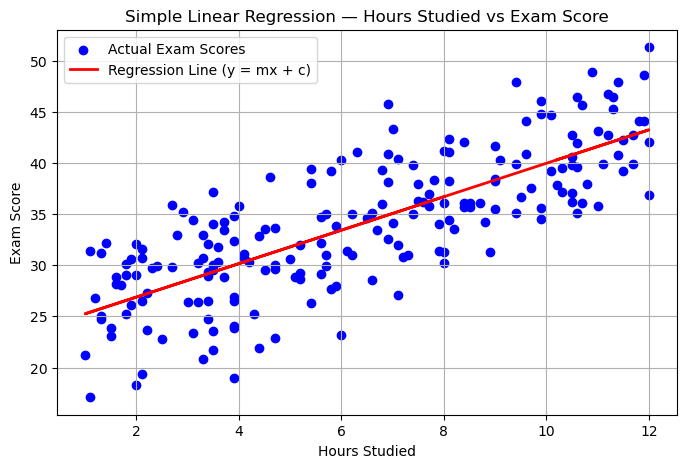

In [4]:
# ---------------- SIMPLE LINEAR REGRESSION (ONE FEATURE) ----------------
x = df['hours_studied'].values.reshape(-1,1)
y_single = df['exam_score'].values.reshape(-1,1)

# Calculate slope (m) and intercept (c)
x_mean = np.mean(x)
y_mean = np.mean(y_single)

numerator = np.sum((x - x_mean) * (y_single - y_mean))
denominator = np.sum((x - x_mean)**2)

m = numerator / denominator
c = y_mean - m * x_mean

print("\nSlope (m):", m)
print("Intercept (c):", c)

# Predict values for plotting
y_line = m * x + c

# ---------------- PLOT ----------------
plt.figure(figsize=(8,5))
plt.scatter(x, y_single, color="blue", label="Actual Exam Scores")
plt.plot(x, y_line, color="red", linewidth=2, label="Regression Line (y = mx + c)")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Simple Linear Regression — Hours Studied vs Exam Score")
plt.legend()
plt.grid(True)
plt.show()
